**1. Chargement et exploration des données**

Chargez le dataset avec pandas

In [1]:
import pandas as pd

url_main = "https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv"
df_pokemon = pd.read_csv(url_main)
df_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Examinez la structure des données (utilisez df.info(), df.describe(), etc.).

In [2]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [3]:
df_pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Les colonnes pertinentes pour la comparaison des Pokémon sont toutes les colonnes sauf le nom car il est unique a chaque Pokemon.

**2. Préparation des données**

Séparez les Pokémon légendaires et non-légendaires.

In [6]:
legendary_pokemon = df_pokemon[df_pokemon["Legendary"] == True]
non_legendary_pokemon = df_pokemon[df_pokemon["Legendary"] == False]

print("dataframe des pokemon légendaires :")
print(legendary_pokemon.head())
print("dataframe des pokemon non légendaires :")
print(non_legendary_pokemon.head())

dataframe des pokemon légendaires :
       #           Name    Type 1    Type 2   HP  Attack  Defense  Sp. Atk  \
156  157       Articuno       Ice    Flying   90      85      100       95   
157  158         Zapdos  Electric    Flying   90      90       85      125   
158  159        Moltres      Fire    Flying   90     100       90      125   
162  163         Mewtwo   Psychic       NaN  106     110       90      154   
163  164  Mega Mewtwo X   Psychic  Fighting  106     190      100      154   

     Sp. Def  Speed  Generation  Legendary  
156      125     85           1       True  
157       90    100           1       True  
158       85     90           1       True  
162       90    130           1       True  
163      100    130           1       True  
dataframe des pokemon non légendaires :
   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poi

Normalisez les données numériques (utilisez StandardScaler ou MinMaxScaler).

In [9]:
from sklearn.preprocessing import StandardScaler
cols_features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
scaler = StandardScaler()
non_legendary_scaled = scaler.fit_transform(non_legendary_pokemon[cols_features])
legendary_scaled = scaler.transform(legendary_pokemon[cols_features])

**3. Implémentation de NearestNeighbors**

Créez un modèle NearestNeighbors et entraînez-le sur l'ensemble des Pokémon non-légendaires.
Choisissez une valeur appropriée pour k (nombre de voisins à considérer) : j'ai mis 5 pour le moment

In [11]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=5)
model.fit(non_legendary_scaled)

NearestNeighbors()

**4. Recherche de similarités**

Pour chaque Pokémon légendaire du champion, trouvez les k Pokémon non-légendaires les plus similaires.
Assurez-vous d'exclure les Pokémon légendaires des recommandations.

In [16]:
recommendations = {}
for i, (name, stats) in enumerate(zip(legendary_pokemon["Name"], legendary_scaled)):
    distances, indices = model.kneighbors([stats])
    recommended_pokemon = non_legendary_pokemon.iloc[indices[0]].copy()
    recommendations[name] = recommended_pokemon

    # Affichage des recommandations
    print(f"\nPokémon légendaire : {name}")
    print("Recommandations :")
    for _, row in recommended_pokemon.iterrows():
        print(f"- {row['Name']} (HP: {row['HP']}, Attack: {row['Attack']}, Defense: {row['Defense']}, Sp. Atk: {row['Sp. Atk']}, Sp. Def: {row['Sp. Def']}, Speed: {row['Speed']})")
    print("-" * 50)


Pokémon légendaire : Articuno
Recommandations :
- Blastoise (HP: 79, Attack: 83, Defense: 100, Sp. Atk: 85, Sp. Def: 105, Speed: 78)
- Milotic (HP: 95, Attack: 60, Defense: 79, Sp. Atk: 100, Sp. Def: 125, Speed: 81)
- Meganium (HP: 80, Attack: 82, Defense: 100, Sp. Atk: 83, Sp. Def: 100, Speed: 80)
- Venusaur (HP: 80, Attack: 82, Defense: 83, Sp. Atk: 100, Sp. Def: 100, Speed: 80)
- Mew (HP: 100, Attack: 100, Defense: 100, Sp. Atk: 100, Sp. Def: 100, Speed: 100)
--------------------------------------------------

Pokémon légendaire : Zapdos
Recommandations :
- Hydreigon (HP: 92, Attack: 105, Defense: 90, Sp. Atk: 125, Sp. Def: 90, Speed: 98)
- Keldeo Ordinary Forme (HP: 91, Attack: 72, Defense: 90, Sp. Atk: 129, Sp. Def: 90, Speed: 108)
- Keldeo Resolute Forme (HP: 91, Attack: 72, Defense: 90, Sp. Atk: 129, Sp. Def: 90, Speed: 108)
- Charizard (HP: 78, Attack: 84, Defense: 78, Sp. Atk: 109, Sp. Def: 85, Speed: 100)
- Typhlosion (HP: 78, Attack: 84, Defense: 78, Sp. Atk: 109, Sp. Def: 

**5. Présentation des résultats**

Pour chaque Pokémon légendaire, présentez une liste des Pokémon non-légendaires recommandés, triés par ordre de similarité.
Incluez les caractéristiques pertinentes dans vos recommandations pour justifier la similarité.

In [18]:
print("\nAnalyse des recommandations :")
for legend, recs in recommendations.items():
    print(f"\nPour {legend}, les Pokémon recommandés sont : {', '.join(recs['Name'].tolist())}")


Analyse des recommandations :

Pour Articuno, les Pokémon recommandés sont : Blastoise, Milotic, Meganium, Venusaur, Mew

Pour Zapdos, les Pokémon recommandés sont : Hydreigon, Keldeo Ordinary Forme, Keldeo Resolute Forme, Charizard, Typhlosion

Pour Moltres, les Pokémon recommandés sont : Hydreigon, Mega Glalie, Arcanine, Charizard, Typhlosion

Pour Mewtwo, les Pokémon recommandés sont : Mega Houndoom, Mega Pidgeot, Hydreigon, Mega Sceptile, Keldeo Ordinary Forme

Pour Mega Mewtwo X, les Pokémon recommandés sont : Mega Garchomp, Mega Blaziken, Mega Salamence, Mega Lucario, Mega Charizard X

Pour Mega Mewtwo Y, les Pokémon recommandés sont : Mega Charizard Y, Mega Sceptile, Mega Gardevoir, Mega Blaziken, Mega Lucario

Pour Raikou, les Pokémon recommandés sont : Delphox, Keldeo Ordinary Forme, Keldeo Resolute Forme, Charizard, Typhlosion

Pour Entei, les Pokémon recommandés sont : Garchomp, Arcanine, Krookodile, Seismitoad, Salamence

Pour Suicune, les Pokémon recommandés sont : Blasto

**6. Analyse et interprétation**

Discutez de la pertinence de vos recommandations.
Réfléchissez à l'impact du choix de k et des caractéristiques sélectionnées sur vos résultats.

Le choix de k influence directement les résultats. Une valeur plus élevée inclurait des Pokémon légèrement moins similaires, mais offrirait une plus grande diversité. À l’inverse, une valeur plus faible garantirait des recommandations plus précises, au prix d’un choix plus restreint.

De même, les caractéristiques sélectionnées jouent un rôle clé dans la détermination de la similarité. Leur impact est direct : modifier les attributs pris en compte, comme ajouter la taille ou le poids, pourrait changer significativement les résultats.

**BONUS**

Créez une visualisation pour illustrer la similarité entre les Pokémon légendaires et vos recommandations (par exemple, en utilisant PCA ou t-SNE pour réduire la dimensionnalité).

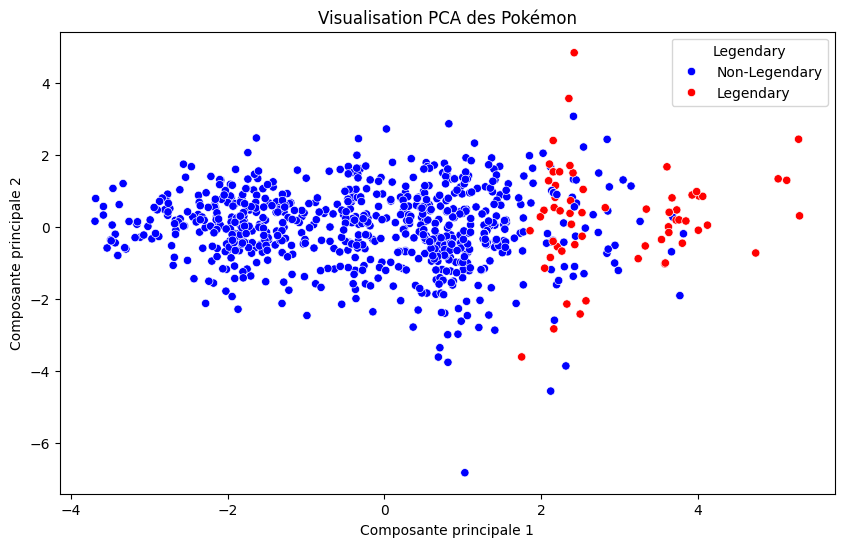

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
all_pokemon_scaled = scaler.transform(df_pokemon[cols_features])
pca_results = pca.fit_transform(all_pokemon_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=df_pokemon["Legendary"].map({True: "Legendary", False: "Non-Legendary"}), palette={"Legendary": "red", "Non-Legendary": "blue"})
plt.title("Visualisation PCA des Pokémon")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

Comparez les résultats obtenus avec différentes métriques de distance (euclidienne, manhattan, etc.).

In [27]:
from sklearn.manifold import TSNE
for i, (name, stats) in enumerate(zip(legendary_pokemon["Name"], legendary_scaled)):
    model_euclidean = NearestNeighbors(n_neighbors=5, metric='euclidean')
    model_euclidean.fit(non_legendary_scaled)
    distances, indices = model_euclidean.kneighbors([stats])
    recommended_pokemon_euclidean = non_legendary_pokemon.iloc[indices[0]].copy()

    model_manhattan = NearestNeighbors(n_neighbors=5, metric='manhattan')
    model_manhattan.fit(non_legendary_scaled)
    distances, indices = model_manhattan.kneighbors([stats])
    recommended_pokemon_manhattan = non_legendary_pokemon.iloc[indices[0]].copy()

    print(f"\nPokémon légendaire : {name}")
    print("Recommandations comparées (Euclidean vs Manhattan) :")
    print("{:<20} {:<20}".format("Euclidean", "Manhattan"))
    print("-" * 40)
    for j in range(5):
        print("{:<20} {:<20}".format(
            recommended_pokemon_euclidean.iloc[j]['Name'],
            recommended_pokemon_manhattan.iloc[j]['Name']
        ))
    print("-" * 50)


Pokémon légendaire : Articuno
Recommandations comparées (Euclidean vs Manhattan) :
Euclidean            Manhattan           
----------------------------------------
Blastoise            Blastoise           
Milotic              Milotic             
Meganium             Meganium            
Venusaur             Kingdra             
Mew                  Venusaur            
--------------------------------------------------

Pokémon légendaire : Zapdos
Recommandations comparées (Euclidean vs Manhattan) :
Euclidean            Manhattan           
----------------------------------------
Hydreigon            Hydreigon           
Keldeo Ordinary Forme Keldeo Ordinary Forme
Keldeo Resolute Forme Keldeo Resolute Forme
Charizard            Charizard           
Typhlosion           Typhlosion          
--------------------------------------------------

Pokémon légendaire : Moltres
Recommandations comparées (Euclidean vs Manhattan) :
Euclidean            Manhattan           
-----------------